# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Conflicts with tidy packages ---------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: filter(): dplyr, stats
lag():    dplyr, stats

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


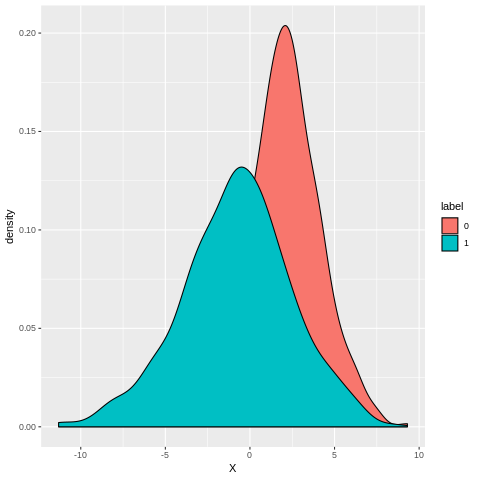

In [9]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

# Converting to factor
dat$label <- as.factor(dat$label)

# Kernel density estimate of the two groups 0 and 1
ggplot(dat, aes(x =X, fill = label)) + geom_density()

# Problem 2: Using Classes in Python

In [13]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """
        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [18]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [20]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)

# Importing random
import random

# Shuffling the data
random.shuffle(dat)

In [21]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [92]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

nr_train = 700
nr_test = len(dat) - nr_train

train = dat[0:nr_train]
test = dat[nr_train:(nr_test+nr_train)]



In [93]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.
train_X = []
train_y = []
test_X = []
test_y = []


# Splitting the training set
for i in range(0,len(train)):
    
    x = train[i][0]
    train_X.append(x)
    
    y = train[i][1]
    train_y.append(y)
    
    

# Splitting the testing set
for i in range(0,len(test)):
    x = test[i][0]
    test_X.append(x)
    
    y = test[i][1]
    test_y.append(y)


## Problem 2.3: Testing models!

In [84]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

# 1. Creating an instances for each model
knn = KNearestNeighbors(5)
furthestNeighbor = KFurthestNeighbors(5)

# Fitting nearest neighbor
knn.fit(train_X, train_y)

# Fitting furthes neighbor
furthestNeighbor.fit(train_X,train_y)

# Predictions are always just a single point -> loop

knn_predictions = []
furthest_predictions = []

for i in range(0,len(test_X)):
    
    # For KNN
    knn_predicted_label = knn.predict(test_X[i])
    knn_predictions.append(knn_predicted_label)
    
    # For furthest Neighbor
    furthest_predicted_label = furthestNeighbor.predict(test_X[i])
    furthest_predictions.append(furthest_predicted_label)

In [85]:
# Predictions are always just a single point -> loop

knn_predictions = []
furthest_predictions = []

for i in range(0,len(test_X)):
    
    # For KNN
    knn_predicted_label = knn.predict(test_X[i])
    knn_predictions.append(knn_predicted_label)
    
    # For furthest Neighbor
    furthest_predicted_label = furthestNeighbor.predict(test_X[i])
    furthest_predictions.append(furthest_predicted_label)


In [86]:
outcome = []

for i in range(0,len(test_y)):
    if test_y[i] == furthest_predictions[i]:
        outcome.append(1)
    else:
        outcome.append(0)

correct_knn = sum([ x==y for (x,y) in zip(test_y, knn_predictions)])
correct_furthest = sum([ x==y for (x,y) in zip(test_y, furthest_predictions)])


In [96]:
# Compare the two classes of models!

print("KNN accuracy "+ "{:.9f}".format(correct_knn/len(test_y)) + " %")
print("Furthest Neighbors accuracy "+ "{:.9f}".format(correct_furthest/len(test_y)) + " %")

KNN accuracy 0.680000000 %
Furthest Neighbors accuracy 0.683333333 %


#### Comparision

Both models have an accuracy of approx. 68 percent. 